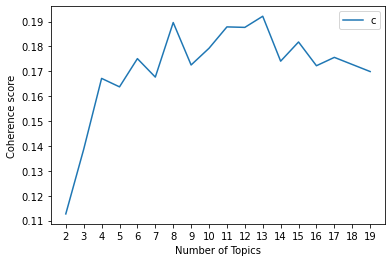

In [1]:
import gensim
import pandas as pd
import matplotlib.pyplot as plt
from gensim.models import CoherenceModel
from gensim import corpora, models

df=pd.read_csv('processedDEV.csv')
df=df.drop(['Unnamed: 0'], axis = 1)
my_list=df.to_numpy().tolist()


#my_doc=pd.read_csv('C:/Users/Kois/unLemmatizedCorpus.csv') #unLemmatized tokens
my_root=pd.read_csv('C:/Users/Kois/lemmatizedCorpus.csv') #Lemmatized tokens
my_root=my_root.drop(['Unnamed: 0.1'], axis = 1)
my_root=my_root.drop(['Unnamed: 0'], axis = 1)
my_root=my_root.to_numpy().tolist()

new_list=[]
temp_list=[]
for x in my_root:
    for item in x:
        if str(item) != 'nan':
            temp_list.append(item)
    new_list.append(temp_list)
    temp_list=[]

stop_words=['እኔ', 'የእኔ', 'እኔራሤ', 'እኛ', 'የእኛ', 'እኛራሣችን', 'አንቺ', 'ነህ', 'አላችሁ', 'እርሥዎ', 'ትፈልጋለህ', 'ያንተ', 'ራሥህን', 'እራሣችሁ', 'እሡ', 'የእሡ', 'ራሡ', 'እሷ', 'እሷናት', 'የእሷ', 'እራሷ', 'ነው', 'እነሡ', 'እነሡን', 'የእነሡ', 'ራሣቸው', 'ምንድን', 'የትኛው', 'ማን', 'ይህ', 'የሚልነው', 'ያ', 'እነዚህ', 'እነዚያ', 'ነኝ', 'ናቸው', 'ነበር', 'ነበሩ', 'ሁን', 'ቆይቷል', 'መሆን',
 'አላቸው', 'አለው', 'ነበረው', 'ያለው', 'መሥራት', 'ያደርጋል', 'አደረገ', 'ማድረግ', 'ሀ', 'አንድ', 'የ', 'እና', 'ከሆነ', 'ወይም', 'ምክንያቱም', 'እንደ', 'እሥከ', 'እያለ', 'በ', 'ለ', 'ጋር', 'ሥለ', 'ላይ', 'መካከል', 'ወደ', 'በኩል', 'ወቅት', 'ከዚህበፊት', 'በኋላ', 'ከላይ', 'ከታች', 'ከ', 'ወደላይ', 'ታች', 'ውሥጥ', 'ውጭ', 'በላይ',
 'እንደገና', 'ተጨማሪ', 'ከዚያ', 'አንድጊዜ', 'እዚህ', 'እዚያ', 'መቼ', 'የት', 'ለምን', 'እንዴት', 'ሁሉም', 'ማንኛውም', 'ሁለቱም', 'እያንዳንዳቸው', 'ጥቂቶች', 'በጣም', 'ሌላ', 'አንዳንድ', 'እንደዚህ', 'ብቻ', 'የራሡ', 'ተመሣሣይ', 'ሥለዚህ', 'ይልቅ', 'እንዲሁ', 'ት', 'ይችላል', 'ይገባል', 'ይገባኛል', 'አሁን', 'መ', 'ም', 'ኦ', 'ዳግም', 'መሆን', 'ሁለ', 'ሁለም', 'ህዝብ', 'ሀሙሥ', 'ለመሆኑ', 'ለምንድን', 'ሌሎች', 'መጽሀፍ', 'ማክሠኞ', 'ምን', 'ሠኞ', 'ሠው', 'ሢሆን', 'ሥንት', 'ረቡእ',
 'ቅዳሜ', 'በዚህ', 'ብላ', 'ነገር', 'አለ', 'አርብ', 'አንተ', 'አንዳንድ', 'ኢትዮጵያ', 'እሁድ', 'እናንተ', 'እንኳን', 'እግር', 'ከመሆን', 'ወይንም', 'ዋና', 'ዘንድ', 'የሚከተለው', 'ያኔ', 'ይኼው', 'ገጽ', 'እነርሡ', 'ን', 'ና', 'ዎች', 'ይጠበቃል', 'ብለዋል', 'ሆ', 'ሁሉ', 'አንቀጽ', 'እንደሆነ', 'በማይበልጥ', 'መሠረት', 'ሁኔታ', 'ይሆናል', 'ሆኖ', 'ከአንድ', 'በማናቸውም',
 'ወር', 'ከአምሥት', 'በሆነ', 'ከዚህ', 'የሆነ', 'ሀያ', 'ሆነ', 'በኊላ', 'በአንድ', 'የሆኑ', 'ከአሥራ', 'የሆነውን', 'መሆኑ', 'ሌላውን', 'ከሠባት', 'ለሌላ', 'አለበት', 'ሢል', 'ይሆናሉ', 'በሙሉ', 'አሥራ', 'ቢሆንም', 'አንዱ', 'የሌላውን', 'ከሁለት', 'የሆኑትን', 'በሆኑ', 'ጀምሮ', 'በመሆን', 'ባለ', 'ይህንን', 'እንዲቆይ', 'ሌላው', 'የሚሆነው', 'በአንዱ', 'ሢባል', 'ሣለ', 'የሆነው', 'መሆናቸው', 'በዋና', 'በማቀድ', 'ጊዜና', 'ለዚህ', 'ሦሥተኛ', 'የነገሩ', 'ሥድሥት', 'በሆነው', 'ይሁን', 'ከዚሁ', 'በእነዚህ', 'ከማናቸውም', 'ከነበረው',
 'በአንዳንድ', 'በእያንዳንዱ', 'ጊዜም', 'አሥከ', 'የሌሎች', 'የሚሆኑት', 'ከሆነው', 'የነበረውን', 'ያሉ', 'ከሌሎች', 'አንዲት', 'ለሌሎች', 'ለሆነው', 'ሠኣት', 'ብሎ', 'ከሠላሣ', 'የሚሆኑ', 'ላይም', 'የሆናል', 'ከነዚህ', 'ያህል', 'ከሆነና', 'ለሆኑት', 'እነዚሁ', 'እንደሆኑ', 'ሥለማናቸውም', 'ሥለዚሁ', 'ከአንዳንድ', 'በእነዚሁ', 'በአምሥት', 'የሆኑበታል', 'ለነዚህ', 'ለማንኛውም', 'አንደኛ', 'ይኸኛው', 'ከርሡ', 'መሆኑን', 'ለዚያው', 'ለዚሁ', 'ለእነርሡም', 'እዚሁ', 'ሀ', 'ረ', 'ሸ', 'አምሥት',
 'ከሦሥት', 'በተለይም', 'በሌላ', 'ሺህ', 'ማናቸውንም', 'ከአሥር', 'የማይበልጥ', 'እንዲሁም', 'ይህን', 'የዚህ', 'ማናቸውም', 'ከሥድሥት', 'መቶ', 'ያለ', 'አንድን', 'ያላቸውን', 'ሊሆን', 'ሦሥት', 'ካልሆነ', 'ቢያንሥ', 'ቢሆን', 'እነዚህን', 'አንዱን', 'ሁለት', 'ወይዘሮ', 'ተብሎ', 'ሣይሆን', 'እንደሆነና', 'ከብር', 'ሆኖም', 'የነበሩ', 'የሌላ', 'ያላቸው', 'ይህንኑ', 'ሆነው', 'በሥተቀር', 'ሥም', 'እንደገና', 'የማያንሥ', 'እጅግ', 'እንዲሆን', 'እንኳ', 'ከሀያ', 'ከሀምሣ', 'ይኸው', 'ለአንድ', 'የሚችለውን',
 'በሚገባ', 'ይህም', 'እንዲሆኑ', 'ከሌላ', 'ለሆነ', 'በሌሎች', 'አንደሆነ', 'እንዲህ', 'በነዚሁ', 'በእንደዚህ', 'ሥምንት', 'ሢሆንና', 'ምንጊዜም', 'ለማናቸውም', 'የአንድ', 'እነዚህኑ', 'ሢሆኑ', 'በሁለቱም', 'እንደነዚህ', 'የሆኑት', 'የማናቸውም', 'ይህንንም', 'የአንድን', 'በሙሉም', 'በነዚህ', 'የዚሁ', 'ለእያንዳንዱ', 'ሥለሆነ', 'መሆናቸውን', 'ማንኛውንም', 'ሁለቱ', 'እንጂ', 'ከሥምንት', 'ሁለቱንም', 'በሁለት', 'በእሥር', 'በሚል', 'ቁጥር', 'ባሉ', 'ከመቶ', 'እነዚህም', 'ሢኖር', 'ሠላሣ', 'ለሆኑ', 'ሠባት', 'እነደሆነ', 'ይህችው', 'ከእነዚህ', 'ከእነዚሁ', 'የአንቀጹ', 'ወይ', 'የሆነችን']


def stopWordRemoval(tokens):
    token_new=[]
    for x in tokens:
        if x not in stop_words:
            token_new.append(x)
    return token_new

processed_docs=[]
for item in new_list:
    processed_docs.append(stopWordRemoval(item))
#processed_docs

dictionary = gensim.corpora.Dictionary(processed_docs)

"""# create N-grams
def make_n_grams(texts):
    bigram = gensim.models.Phrases(texts, min_count=3, threshold=100)  # higher threshold fewer phrases.
    bigram_mod = gensim.models.phrases.Phraser(bigram)
    trigram = gensim.models.Phrases(bigram[texts], threshold=100)
    trigram_mod = gensim.models.phrases.Phraser(trigram)
    bigrams_text = [bigram_mod[doc] for doc in texts]
    trigrams_text =  [trigram_mod[bigram_mod[doc]] for doc in bigrams_text]
    return trigrams_text"""

#evaluating the effect of bigrams and trigrams on topic coherence
#n_gram=make_n_grams(processed_docs)

#processed_docs=n_gram #evaluating the effect of bigrams and trigrams on topic coherence
    #dictionary.filter_extremes(no_below=0, no_above=0.5, keep_n=100000)
bow_corpus = [dictionary.doc2bow(doc) for doc in processed_docs]

tfidf = models.TfidfModel(bow_corpus)
corpus_tfidf = tfidf[bow_corpus]

lda_model = gensim.models.LdaMulticore(bow_corpus, num_topics=10, id2word=dictionary, passes=3, workers=2, alpha=1)

def compute_coherence_values(dictionary, doc_term_matrix, start, stop, step):
    """
    Input   : dictionary : Gensim dictionary
              corpus : Gensim corpus
              texts : List of input texts
              stop : Max num of topics
    purpose : Compute c_v coherence for various number of topics
    Output  : model_list : List of LDA topic models
              coherence_values : Coherence values corresponding to the LDA model with respective number of topics
    """
    coherence_values = []
    model_list = []
    for num_topics in range(start, stop, step):
        # generate LDA model
        #lda_model_tfidf = gensim.models.LdaMulticore(corpus_tfidf, num_topics=10, id2word=dictionary, passes=2, workers=4)
        lda_model = gensim.models.LdaMulticore(bow_corpus, num_topics, id2word=dictionary, passes=3, workers=2, alpha=1)  # train model
        model_list.append(lda_model)
        coherencemodel = CoherenceModel(model=lda_model, corpus=bow_corpus,texts=processed_docs, coherence='c_v')
        coherence_values.append(coherencemodel.get_coherence())
    return coherence_values

def plot_graph(doc_clean,start, stop, step):
    coherence_values = compute_coherence_values(dictionary, bow_corpus, start,stop, step)
    # Show graph
    x = range(start, stop, step)
    plt.plot(x, coherence_values)
    plt.xlabel("Number of Topics")
    plt.ylabel("Coherence score")
    plt.xticks(x)
    plt.legend(("coherence_values"), loc='best')
    plt.show()

start,stop,step=2,20,1
plot_graph(bow_corpus,start,stop,step)